In [ ]:
import os
from google.colab import drive

# This allows us to pull data directly from our shared drive to this notebook
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/ADNI")

Mounted at /content/drive/


In [ ]:
from pathlib import Path
import nibabel as nib
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
labels = pd.read_csv("df382.csv")
labels

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,2,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
1,6,I63847,941_S_1194,CN,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,1/20/2007,NiFTI,NaN
2,14,I74557,137_S_1414,MCI,M,74,1,MRI,MPR; GradWarp; N3; Scaled,Processed,8/01/2007,NiFTI,NaN
3,16,I43071,137_S_1041,AD,M,71,1,MRI,MPR-R; GradWarp; N3; Scaled,Processed,11/09/2006,NiFTI,NaN
4,25,I45943,137_S_0994,MCI,F,55,1,MRI,MPR; GradWarp; N3; Scaled,Processed,11/01/2006,NiFTI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2150,I118682,002_S_0729,MCI,F,65,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,7/17/2006,NiFTI,NaN
378,2160,I40683,002_S_0685,CN,F,90,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,7/06/2006,NiFTI,NaN
379,2164,I48617,002_S_0619,AD,M,78,1,MRI,MPR-R; GradWarp; N3; Scaled,Processed,6/01/2006,NiFTI,NaN
380,2168,I118673,002_S_0413,CN,F,76,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,5/02/2006,NiFTI,NaN


In [ ]:
ROOT_PATH = Path("ADNI_Images/")
SAVE_PATH = Path("Processed/Sagittal")

In [ ]:
nifti = nib.load("ADNI_Images/137_S_0796.nii")
print(nifti.shape)

(256, 256, 180)


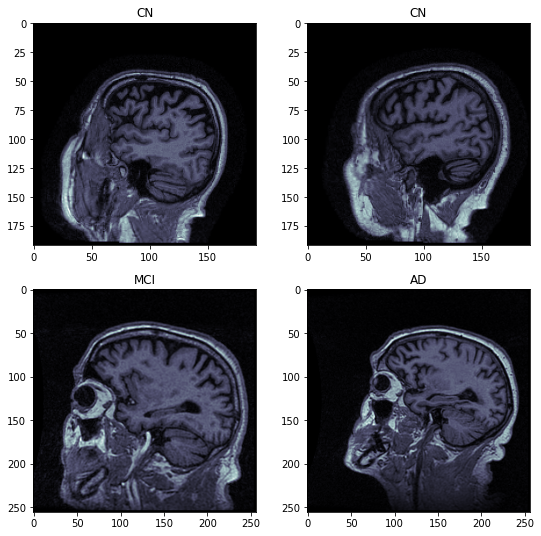

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(9,9))
c = 0
for i in range(2):
  for j in range(2):
    patient_id = labels.Subject.iloc[c]
    nii_path = ROOT_PATH/patient_id
    nii_path = nii_path.with_suffix(".nii")
    nii = nib.load(nii_path).get_fdata()[:,:,120]

    label = labels['Group'].iloc[c]

    axis[i][j].imshow(nii, cmap="bone")
    axis[i][j].set_title(label)
    c+=1

In [ ]:
import matplotlib
#Sagittal view
sums, sums_squared = 0,0

for c, patient_id in enumerate(tqdm(labels.Subject)):
    patient_id = labels.Subject.iloc[c]
    nii_path = ROOT_PATH/patient_id
    nii_path = nii_path.with_suffix(".nii")

    slices = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

    for i in range(len(slices)):
      nii = nib.load(nii_path).get_fdata()[:,:,slices[i]] / 255
      patient_id_new = patient_id + '_sag' + str(slices[i])
      nii_array = cv2.resize(nii, (224, 224)).astype(np.float16)
      label = labels['Group'].iloc[c]
      train_or_test = "train" if c > 76 else "test"
      current_save_path = SAVE_PATH/train_or_test/str(label)
      current_save_path.mkdir(parents=True, exist_ok=True)
      matplotlib.image.imsave(str(current_save_path) + '/' + patient_id_new + '.png', nii_array, cmap='bone')


  0%|          | 0/382 [00:00<?, ?it/s]

In [ ]:
import matplotlib
#Coronal view
sums, sums_squared = 0,0

for c, patient_id in enumerate(tqdm(labels.Subject)):
    patient_id = labels.Subject.iloc[c]
    nii_path = ROOT_PATH/patient_id
    nii_path = nii_path.with_suffix(".nii")

    slices = [118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]

    for i in range(len(slices)):
      nii = nib.load(nii_path).get_fdata()[:, slices[i], :] / 255
      patient_id_new = patient_id + '_cor' + str(slices[i])
      nii_array = cv2.resize(nii, (224, 224)).astype(np.float16)
      label = labels['Group'].iloc[c]
      train_or_test = "train" if c > 76 else "test"
      current_save_path = SAVE_PATH/train_or_test/str(label)
      current_save_path.mkdir(parents=True, exist_ok=True)
      matplotlib.image.imsave(str(current_save_path) + '/' + patient_id_new + '.png', nii_array, cmap='bone')

  0%|          | 0/382 [00:00<?, ?it/s]

In [ ]:
import matplotlib
#Axial view
sums, sums_squared = 0,0

for c, patient_id in enumerate(tqdm(labels.Subject)):
    patient_id = labels.Subject.iloc[c]
    nii_path = ROOT_PATH/patient_id
    nii_path = nii_path.with_suffix(".nii")

    slices = [118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]

    for i in range(len(slices)):
      nii = nib.load(nii_path).get_fdata()[slices[i],:, :] / 255
      patient_id_new = patient_id + '_ax' + str(slices[i])
      nii_array = cv2.resize(nii, (224, 224)).astype(np.float16)
      label = labels['Group'].iloc[c]
      train_or_test = "train" if c > 76 else "test"
      current_save_path = SAVE_PATH/train_or_test/str(label)
      current_save_path.mkdir(parents=True, exist_ok=True)
      matplotlib.image.imsave(str(current_save_path) + '/' + patient_id_new + '.png', nii_array, cmap='bone')

  0%|          | 0/382 [00:00<?, ?it/s]